<a href="https://colab.research.google.com/github/EnoshVechalapu/ComputerVision/blob/main/CNN_Assignment_DLFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**:

A social media company wants to design a method which differentiates images uploaded by different
users in the social media into one of several classes. The purpose is to identify and block malicious
images uploaded by any user in the social media before it spreads.

The different classes are:
(a) malicious, (b) acceptable, and (c) completely safe.

While collecting and labelling the dataset, the
engineers want to try their method on a toy dataset (e.g., MNIST data) to analyse different practical
issues. Develop a CNN and study the effect of various aspects of the network to help the team.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mean = [0.4914, 0.4822, 0.4465]
std = [0.2470, 0.2435, 0.2616]

normalize_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean = mean,
                                     std = std)])

train_dataset = torchvision.datasets.CIFAR10(
    root="./CIFAR10/train", train=True,
    transform=normalize_transform,
    download=True)



test_dataset = torchvision.datasets.CIFAR10(
    root="./CIFAR10/test", train=False,
    transform=normalize_transform,
    download=True)

100%|██████████| 170498071/170498071 [00:05<00:00, 29853420.29it/s]


Extracting ./CIFAR10/train/cifar-10-python.tar.gz to ./CIFAR10/train


100%|██████████| 170498071/170498071 [00:08<00:00, 20281829.59it/s]


Extracting ./CIFAR10/test/cifar-10-python.tar.gz to ./CIFAR10/test


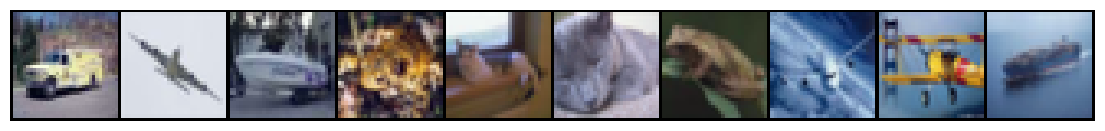

truck airplane ship frog cat cat frog airplane airplane ship 

In [ ]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)


plt.rcParams['figure.figsize'] = 14, 6

dataiter = iter(train_loader)
images, labels = next(dataiter)
plt.imshow(np.transpose(torchvision.utils.make_grid(
  images[:10], normalize=True, padding=1, nrow=10).numpy(), (1, 2, 0)))
plt.axis('off')
plt.show()

# Printing Labels
label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
               "horse", "ship", "truck"]
labels_now = labels[:10]
for x in labels_now.tolist():
  print(label_names[x], end=" ")

Text(0, 0.5, 'Number of training instances')

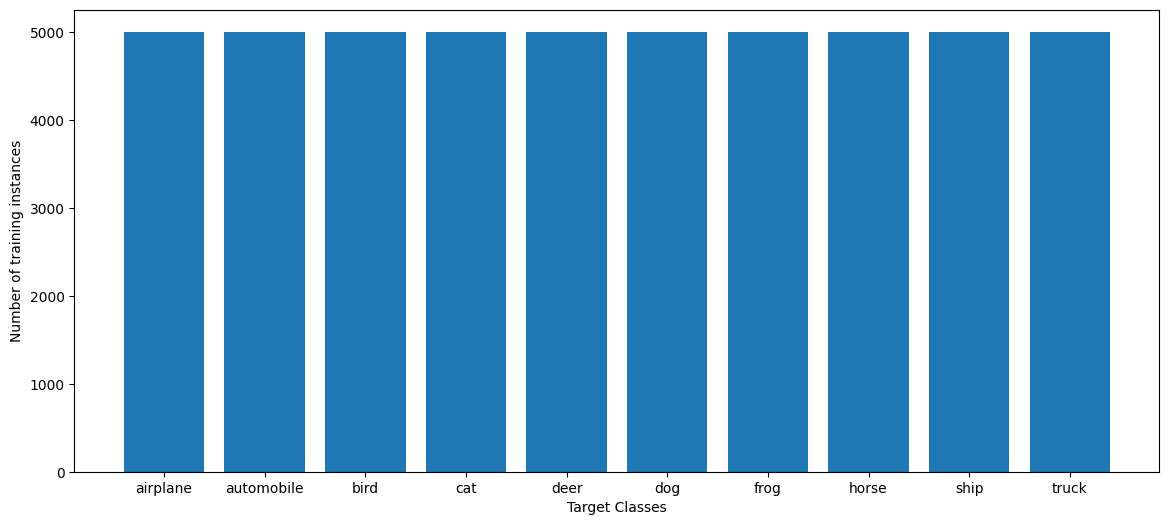

In [ ]:
classes = []
for batch_idx, data in enumerate(train_loader, 0):
    x, y = data
    classes.extend(y.tolist())

#Calculating the unique classes and the respective counts and plotting them
unique, counts = np.unique(classes, return_counts=True)
names = list(train_dataset.class_to_idx.keys())
plt.bar(names, counts)
plt.xlabel("Target Classes")
plt.ylabel("Number of training instances")

### **Implementation of a CNN (named, CNN-Vanilla).**


In [ ]:
class CNN_Vanilla(nn.Module):
    def __init__(self):
        super(CNN_Vanilla, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)

        # Max pooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 2 * 2, 256)  # Corrected: 2x2 image dimension after 2x2 pooling
        self.fc2 = nn.Linear(256, 10)  # 10 output classes (example for classification)

    def forward(self, x):
        # Convolutional layers with ReLU activation and pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))

        # Flatten the tensor for fully connected layers
        x = x.view(-1, 128 * 2 * 2)

        # Fully connected layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x


from torchsummary import summary
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
model_to_analyse = CNN_Vanilla().to(device)
print(model_to_analyse)

summary(model_to_analyse, (3, 32, 32))


cuda
CNN_Vanilla(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
         MaxPool2d-2           [-1, 16, 16, 16]               0
            Conv2d-3           [-1, 32, 16, 16]           4,640
         MaxPool2d-4             [-1, 32, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          18,496
         MaxPoo

Training

Epoch 1/25: Training loss = 1.579704308143967
Epoch 2/25: Training loss = 1.2056463426336304
Epoch 3/25: Training loss = 1.0130130799530108
Epoch 4/25: Training loss = 0.8911090482531301
Epoch 5/25: Training loss = 0.789435895812481
Epoch 6/25: Training loss = 0.6991901468590397
Epoch 7/25: Training loss = 0.6292012968788976
Epoch 8/25: Training loss = 0.5766462038849931
Epoch 9/25: Training loss = 0.512539847046518
Epoch 10/25: Training loss = 0.46043696969061554
Epoch 11/25: Training loss = 0.41520089760918144
Epoch 12/25: Training loss = 0.3620578725548351
Epoch 13/25: Training loss = 0.321178900692469
Epoch 14/25: Training loss = 0.2865297611793289
Epoch 15/25: Training loss = 0.24892724436872146
Epoch 16/25: Training loss = 0.22442151063009905
Epoch 17/25: Training loss = 0.19527827799701325
Epoch 18/25: Training loss = 0.17233447624784906
Epoch 19/25: Training loss = 0.1531123477975121
Epoch 20/25: Training loss = 0.1421475670755367
Epoch 21/25: Training loss = 0.1265827302661393

Text(0, 0.5, 'Training loss')

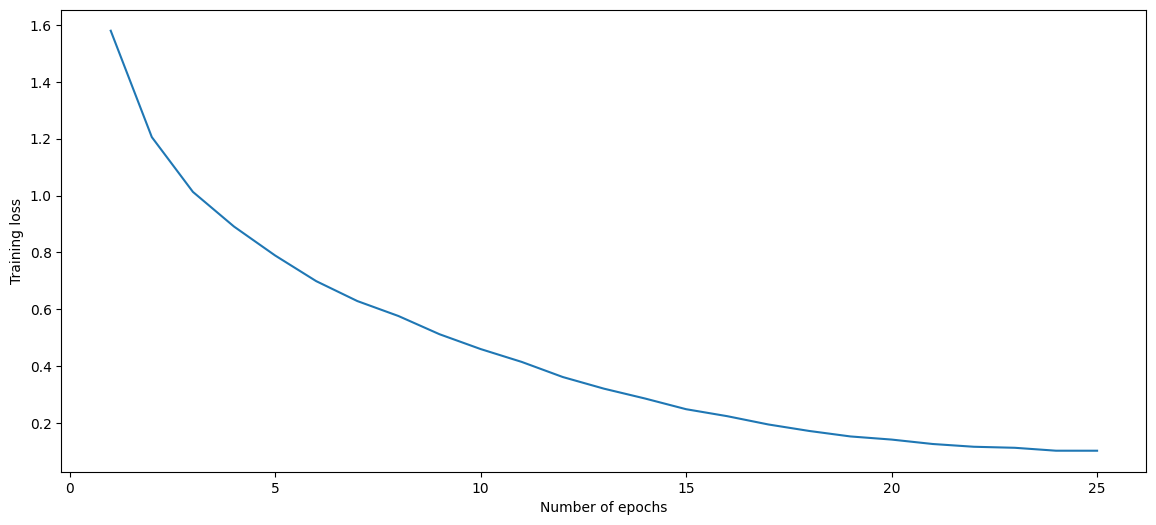

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN_Vanilla().to(device)

#Defining the model hyper parameters
num_epochs = 25
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Training process begins
train_loss_list = []
for epoch in range(num_epochs):
	print(f'Epoch {epoch+1}/{num_epochs}:', end = ' ')
	train_loss = 0

	#Iterating over the training dataset in batches
	model.train()
	for i, (images, labels) in enumerate(train_loader):

		#Extracting images and target labels for the batch being iterated
		images = images.to(device)
		labels = labels.to(device)

		#Calculating the model output and the cross entropy loss
		outputs = model(images)
		loss = criterion(outputs, labels)

		#Updating weights according to calculated loss
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
		train_loss += loss.item()

	#Printing loss for each epoch
	train_loss_list.append(train_loss/len(train_loader))
	print(f"Training loss = {train_loss_list[-1]}")

#Plotting loss for all epochs
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

In [ ]:
test_acc=0
model.eval()

with torch.no_grad():
    #Iterating over the test dataset in batches
    for i, (images, labels) in enumerate(test_loader):

        images = images.to(device)
        y_true = labels.to(device)

        #Calculating outputs for the batch being iterated
        outputs = model(images)

        #Calculated prediction labels from models
        _, y_pred = torch.max(outputs.data, 1)

        #Comparing predicted and true labels
        test_acc += (y_pred == y_true).sum().item()

    print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")

Test set accuracy = 73.3 %


(-0.5, 165.5, 33.5, -0.5)

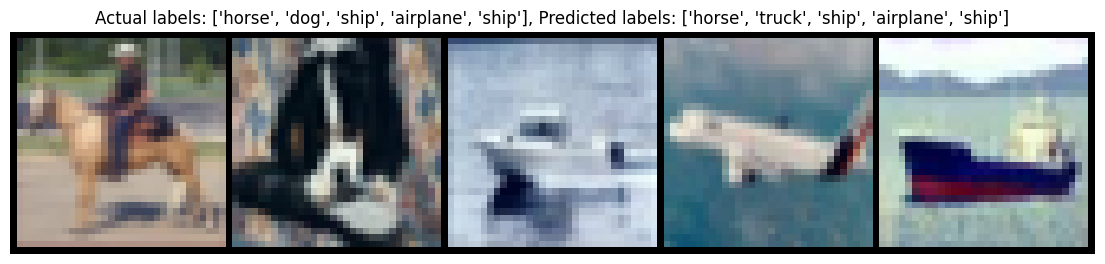

In [ ]:
num_images = 5
y_true_name = [names[y_true[idx]] for idx in range(num_images)]
y_pred_name = [names[y_pred[idx]] for idx in range(num_images)]

#Generating the title for the plot
title = f"Actual labels: {y_true_name}, Predicted labels: {y_pred_name}"

#Finally plotting the images with their actual and predicted labels in the title
plt.imshow(np.transpose(torchvision.utils.make_grid(images[:num_images].cpu(), normalize=True, padding=1).numpy(), (1, 2, 0)))
plt.title(title)
plt.axis("off")

### **Implementation of a Resnet based CNN (SimpleResNet).**

In [ ]:

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = F.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = F.relu(out)

        return out



In [ ]:
class ResNetLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResNetLayer, self).__init__()
        self.layer1 = ResidualBlock(in_channels, out_channels)
        self.layer2 = ResidualBlock(out_channels, out_channels)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x


In [ ]:
class SimpleResNet(nn.Module):
    def __init__(self):
        super(SimpleResNet, self).__init__()
        self.conv = nn.Conv2d(3, 64, kernel_size=3, padding=1, bias=False)
        self.bn = nn.BatchNorm2d(64)
        self.layer1 = ResNetLayer(64, 64)
        self.fc = nn.Linear(64 * 32 * 32, 10)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = F.relu(x)

        x = self.layer1(x)

        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x


In [ ]:
from torchsummary import summary
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
model = SimpleResNet().to(device)

# Print the model summary
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
     ResidualBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
    ResidualBlock-12           [-1, 64, 32, 32]               0
      ResNetLayer-13           [-1, 64, 32, 32]               0
           Linear-14              

## Study the effect of different Optimizers



*   Stochastic gradient descent with no momentum
*   Stochastic gradient descent with momentum
*   Adam Optimizer



A plot of training accuracy vs epochs for the three cases of optimizers.
Also, mention the best choice among the three

In [ ]:
def train(model, device, train_loader, optimizer, epoch, log_interval=100):
    model.train()
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        if batch_idx % log_interval == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

    accuracy = 100. * correct / len(train_loader.dataset)
    return accuracy


In [ ]:
mean = [0.4914, 0.4822, 0.4465]
std = [0.2470, 0.2435, 0.2616]
def compare_optimizers(epochs=10, batch_size=256):
    normalize_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean = mean,
                                     std = std)])
    train_dataset = torchvision.datasets.CIFAR10(
    root="./CIFAR10/train", train=True,
    transform=normalize_transform,
    download=True)



    test_dataset = torchvision.datasets.CIFAR10(
    root="./CIFAR10/test", train=False,
    transform=normalize_transform,
    download=True)


    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model1 = SimpleResNet().to(device)
    model2 = SimpleResNet().to(device)
    model3 = SimpleResNet().to(device)

    optimizer1 = optim.SGD(model1.parameters(), lr=0.01)
    optimizer2 = optim.SGD(model2.parameters(), lr=0.001, momentum=0.9)
    optimizer3 = optim.Adam(model3.parameters(), lr=0.001)

    accuracies1, accuracies2, accuracies3 = [], [], []

    for epoch in range(1, epochs + 1):
        acc1 = train(model1, device, train_loader, optimizer1, epoch)
        acc2 = train(model2, device, train_loader, optimizer2, epoch)
        acc3 = train(model3, device, train_loader, optimizer3, epoch)

        accuracies1.append(acc1)
        accuracies2.append(acc2)
        accuracies3.append(acc3)




    return accuracies1, accuracies2, accuracies3


In [ ]:
def train(model, device, train_loader, optimizer, epoch, log_interval=100):
    model.train()
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        if batch_idx % log_interval == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

    accuracy = 100. * correct / len(train_loader.dataset)
    print(f'Train Epoch: {epoch}\tAccuracy: {accuracy:.2f}%')
    return accuracy

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 [0/50000 (0%)]	Loss: 2.795908
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.948273
Train Epoch: 1	Accuracy: 33.79%
Train Epoch: 1 [0/50000 (0%)]	Loss: 2.667192
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.527107
Train Epoch: 1	Accuracy: 39.82%
Train Epoch: 1 [0/50000 (0%)]	Loss: 2.675384
Train Epoch: 1 [25600/50000 (51%)]	Loss: 2.063545
Train Epoch: 1	Accuracy: 34.83%
Train Epoch: 2 [0/50000 (0%)]	Loss: 1.853215
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.365748
Train Epoch: 2	Accuracy: 49.09%
Train Epoch: 2 [0/50000 (0%)]	Loss: 1.492947
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.561586
Train Epoch: 2	Accuracy: 55.68%
Train Epoch: 2 [0/50000 (0%)]	Loss: 2.773712
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.348291
Train Epoch: 2	Accuracy: 49.34%
Train Epoch: 3 [0/50000 (0%)]	Loss: 1.599299
Train Epoch: 3 [25600/50000 (51%)]	Loss: 1.259280
Train Epoch: 3	Accuracy: 54.85%
Train Epoch: 3 [0/50000 (0%)]	Loss:

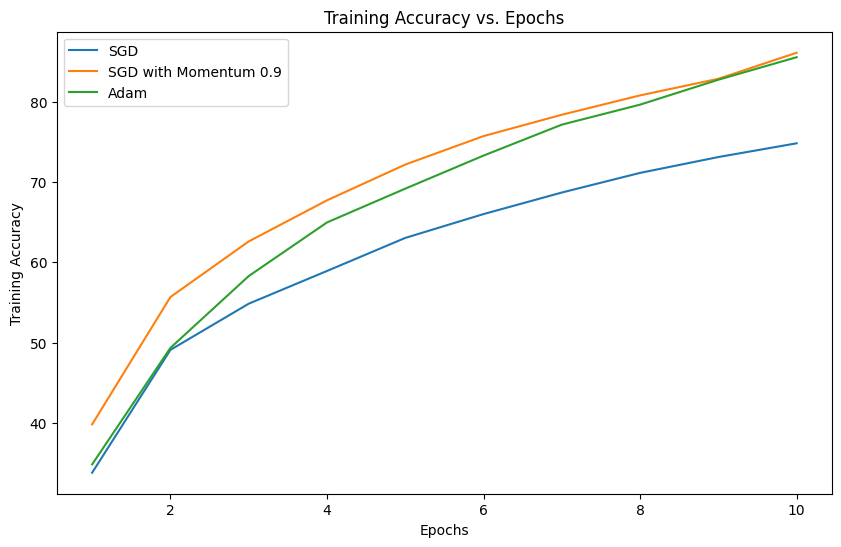

In [ ]:
def plot_accuracies(accuracies1, accuracies2, accuracies3, epochs=10):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), accuracies1, label='SGD')
    plt.plot(range(1, epochs + 1), accuracies2, label='SGD with Momentum 0.9')
    plt.plot(range(1, epochs + 1), accuracies3, label='Adam')
    plt.xlabel('Epochs')
    plt.ylabel('Training Accuracy')
    plt.title('Training Accuracy vs. Epochs')
    plt.legend()
    plt.show()

# Run the comparison and plot the results
accuracies1, accuracies2, accuracies3 = compare_optimizers()
plot_accuracies(accuracies1, accuracies2, accuracies3)

**From above results we can see for training SGD with momentum 0.9 worked well for the data**

### This was the result when i tried learning rate = 0.01 for SGD with momentum .

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 [0/50000 (0%)]	Loss: 2.640251
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.854534
Train Epoch: 1 [0/50000 (0%)]	Loss: 2.446034
Train Epoch: 1 [25600/50000 (51%)]	Loss: 2.302665
Train Epoch: 1 [0/50000 (0%)]	Loss: 2.551065
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.899232
Train Epoch: 2 [0/50000 (0%)]	Loss: 1.830156
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.878175
Train Epoch: 2 [0/50000 (0%)]	Loss: 2.302816
Train Epoch: 2 [25600/50000 (51%)]	Loss: 2.302433
Train Epoch: 2 [0/50000 (0%)]	Loss: 1.561338
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.481665
Train Epoch: 3 [0/50000 (0%)]	Loss: 1.592248
Train Epoch: 3 [25600/50000 (51%)]	Loss: 1.315882
Train Epoch: 3 [0/50000 (0%)]	Loss: 2.302949
Train Epoch: 3 [25600/50000 (51%)]	Loss: 2.302389
Train Epoch: 3 [0/50000 (0%)]	Loss: 1.210831
Train Epoch: 3 [25600/50000 (51%)]	Loss: 1.329089
Train Epoch: 4 [0/50000 (0%)]	Loss: 1.814797
Train Epoch: 4 [25600/50

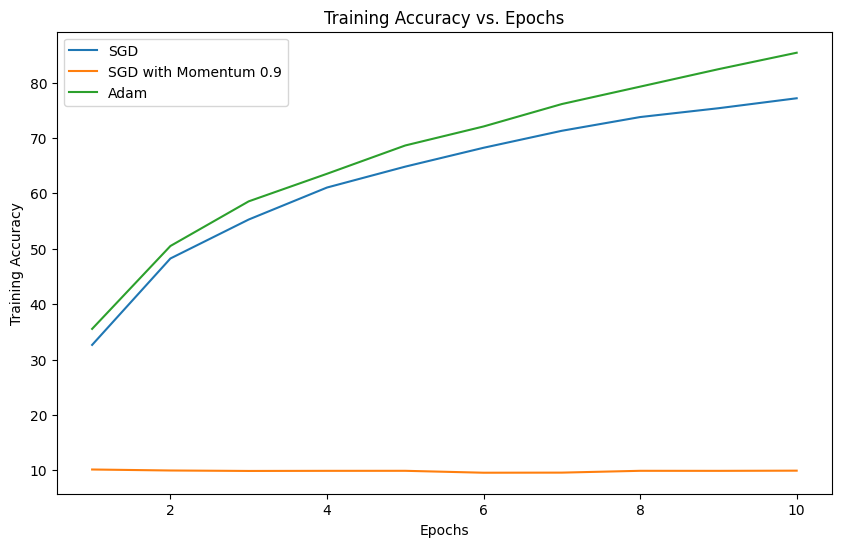

In [ ]:
def plot_accuracies(accuracies1, accuracies2, accuracies3, epochs=10):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), accuracies1, label='SGD')
    plt.plot(range(1, epochs + 1), accuracies2, label='SGD with Momentum 0.9')
    plt.plot(range(1, epochs + 1), accuracies3, label='Adam')
    plt.xlabel('Epochs')
    plt.ylabel('Training Accuracy')
    plt.title('Training Accuracy vs. Epochs')
    plt.legend()
    plt.show()

# Run the comparison and plot the results
accuracies1, accuracies2, accuracies3 = compare_optimizers()
plot_accuracies(accuracies1, accuracies2, accuracies3)


From the above result , we can see the learning rate didn't worked well in case of SGD with momentum

## Study the Effect of Regularizers.

### Batch Normalization and Dropout

* A plot of testing accuracy vs epochs for the case of optimizers.










In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.dropout1 = nn.Dropout(p=0.5)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.dropout2 = nn.Dropout(p=0.5)
        self.downsample = downsample

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.dropout1(out)
        out = F.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.dropout2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = F.relu(out)

        return out

In [ ]:
class ResNetLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResNetLayer, self).__init__()
        self.layer1 = ResidualBlock(in_channels, out_channels)
        self.layer2 = ResidualBlock(out_channels, out_channels)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x


In [ ]:
class SimpleResNet(nn.Module):
    def __init__(self):
        super(SimpleResNet, self).__init__()
        self.conv = nn.Conv2d(3, 64, kernel_size=3, padding=1, bias=False)
        self.bn = nn.BatchNorm2d(64)
        self.dropout = nn.Dropout(p=0.5)
        self.layer1 = ResNetLayer(64, 64)
        self.fc = nn.Linear(64 * 32 * 32, 10)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.dropout(x)
        x = F.relu(x)

        x = self.layer1(x)

        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

In [ ]:
def train(model, device, train_loader, optimizer, epoch, log_interval=100):
    model.train()
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        if batch_idx % log_interval == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

    accuracy = 100. * correct / len(train_loader.dataset)
    return accuracy


In [ ]:
def evaluate(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, accuracy


In [ ]:
def compare_regularizers(epochs=10, batch_size=256):

    normalize_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean = mean,
                                     std = std)])
    train_dataset = torchvision.datasets.CIFAR10(
    root="./CIFAR10/train", train=True,
    transform=normalize_transform,
    download=True)



    test_dataset = torchvision.datasets.CIFAR10(
    root="./CIFAR10/test", train=False,
    transform=normalize_transform,
    download=True)


    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model1 = SimpleResNet().to(device)

    optimizer1 = optim.Adam(model1.parameters(), lr=0.001)

    accuracies1 = []

    for epoch in range(1, epochs + 1):
        acc1 = train(model1, device, train_loader, optimizer1, epoch)


        _, test_acc1 = evaluate(model1, device, test_loader)


        accuracies1.append(test_acc1)


    return accuracies1

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 [0/50000 (0%)]	Loss: 2.803571
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.869551
Train Epoch: 1 [25600/50000 (51%)]	Loss: 3.385501
Train Epoch: 1 [38400/50000 (77%)]	Loss: 2.971324
Train Epoch: 2 [0/50000 (0%)]	Loss: 1.622775
Train Epoch: 2 [12800/50000 (26%)]	Loss: 2.824527
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.919996
Train Epoch: 2 [38400/50000 (77%)]	Loss: 2.105080
Train Epoch: 3 [0/50000 (0%)]	Loss: 1.696165
Train Epoch: 3 [12800/50000 (26%)]	Loss: 1.791412
Train Epoch: 3 [25600/50000 (51%)]	Loss: 1.488992
Train Epoch: 3 [38400/50000 (77%)]	Loss: 1.463118
Train Epoch: 4 [0/50000 (0%)]	Loss: 1.231868
Train Epoch: 4 [12800/50000 (26%)]	Loss: 2.024725
Train Epoch: 4 [25600/50000 (51%)]	Loss: 0.964932
Train Epoch: 4 [38400/50000 (77%)]	Loss: 1.275856
Train Epoch: 5 [0/50000 (0%)]	Loss: 1.068462
Train Epoch: 5 [12800/50000 (26%)]	Loss: 1.097616
Train Epoch: 5 [25600/50000 (51%)]	Loss: 1.144385

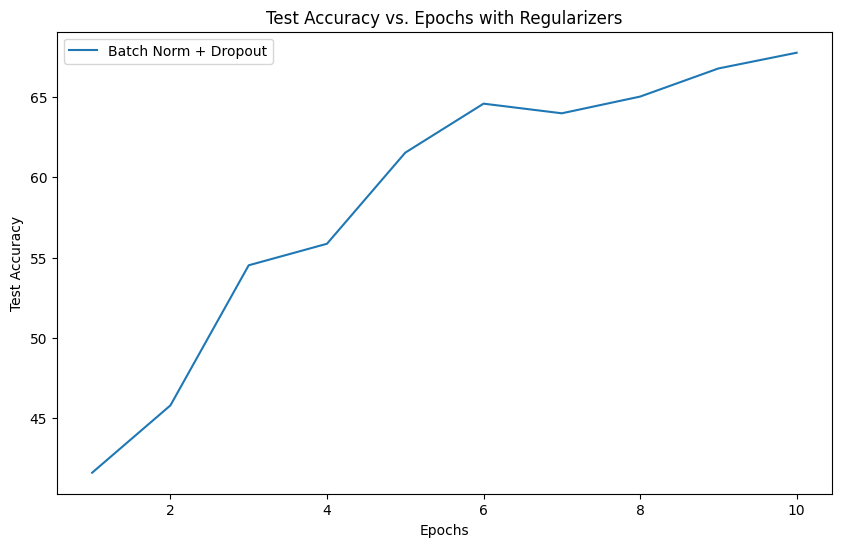

In [ ]:
def plot_accuracies(accuracies1, epochs=10):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), accuracies1, label='Batch Norm + Dropout')
    plt.xlabel('Epochs')
    plt.ylabel('Test Accuracy')
    plt.title('Test Accuracy vs. Epochs with Regularizers')
    plt.legend()
    plt.show()

# Run the comparison and plot the results
accuracies1 = compare_regularizers()
plot_accuracies(accuracies1)